### Dataframes Code
--- 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

#To display all rows and columns of dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Read CSV file and skip certain rows to obtain data needed  
int_visitors = pd.read_csv("International Visitor Arrivals.csv", nrows = 62, skiprows = [0, 1, 2, 3])
int_visitors.columns = int_visitors.columns.str.strip()

#Swap position of index and columns and strip column values of white spaces
int_visitors = int_visitors.set_index('Variables').transpose()
int_visitors.columns = int_visitors.columns.str.strip()

#Reset index number to start from 0
int_visitors = int_visitors.reset_index()

#Rename column name to 'Dates'
int_visitors.columns.name = None
int_visitors = int_visitors.rename(columns = {'index' : 'Dates'})

#Remove ',' string can convert data to float for columns
int_visitors['International Visitor Arrivals By Inbound Tourism Markets, (Air)'] = int_visitors['International Visitor Arrivals By Inbound Tourism Markets, (Air)'].str.replace(',', '').astype(float).fillna(int_visitors['International Visitor Arrivals By Inbound Tourism Markets, (Air)'])
int_visitors['Southeast Asia'] = int_visitors['Southeast Asia'].str.replace(',', '').astype(float).fillna(int_visitors['Southeast Asia'])
int_visitors['Brunei Darussalam'] = int_visitors['Brunei Darussalam'].str.replace(',', '').astype(float).fillna(int_visitors['Brunei Darussalam'])
int_visitors['Indonesia'] = int_visitors['Indonesia'].str.replace(',', '').astype(float).fillna(int_visitors['Indonesia'])
int_visitors['Malaysia'] = int_visitors['Malaysia'].str.replace(',', '').astype(float).fillna(int_visitors['Malaysia'])
int_visitors['Myanmar'] = int_visitors['Myanmar'].str.replace(',', '').astype(float).fillna(int_visitors['Myanmar'])
int_visitors['Philippines'] = int_visitors['Philippines'].str.replace(',', '').astype(float).fillna(int_visitors['Philippines'])
int_visitors['Thailand'] = int_visitors['Thailand'].str.replace(',', '').astype(float).fillna(int_visitors['Thailand'])
int_visitors['Vietnam'] = int_visitors['Vietnam'].str.replace(',', '').astype(float).fillna(int_visitors['Vietnam'])
int_visitors['Other Markets In Southeast Asia'] = int_visitors['Other Markets In Southeast Asia'].str.replace(',', '').astype(float).fillna(int_visitors['Other Markets In Southeast Asia'])

#Function to change the format of dates from '2019 Jan' to 'Jan-2019'
def convert(string):
    return str(f"{string[5:]}-{string[0:4]}")

int_visitors['Dates'] = int_visitors['Dates'].apply(convert)


int_visitors

,Dates,"International Visitor Arrivals By Inbound Tourism Markets, (Air)",Southeast Asia,Brunei Darussalam,Indonesia,Malaysia,Myanmar,Philippines,Thailand,Vietnam,Other Markets In Southeast Asia,Greater China,China,Hong Kong SAR,Taiwan,Other Markets In Greater China,North Asia,Japan,South Korea,Other Markets In North Asia,South Asia,Bangladesh,India,Pakistan,Sri Lanka,Other Markets In South Asia,West Asia,Iran,Israel,Kuwait,Saudi Arabia,United Arab Emirates,Other Markets In West Asia,Americas,Canada,USA,Other Markets In Americas,Europe,Belgium & Luxembourg,Denmark,Finland,France,Germany *,Italy,Netherlands,Norway,Rep Of Ireland,Russian Federation,Spain,Sweden,Switzerland,United Kingdom,Other Markets In Europe,Oceania,Australia,New Zealand,Other Markets In Oceania,Africa,Egypt,Mauritius,South Africa (Rep Of),Other Markets In Africa,Others
0,Jan-2019,1240779.0,349335.0,5422.0,157671.0,69935.0,10265.0,40507.0,30536.0,29621.0,5378.0,"297,662","237,028","26,779","31,176","2,679","107,975","56,799","51,164",12,"102,495","9,247","82,953","1,589","5,799","2,907","10,403",140,"2,241","1,000",882,"4,626","1,514","74,823","11,363","55,086","8,374","174,958","2,146","3,201","3,290","14,736","30,525","7,396","6,899","2,571","1,689","10,987","3,413","6,943","7,952","46,031","27,179","117,472","104,572","11,108","1,792","5,656",321,709,"2,771","1,855",0
1,Feb-2019,1141020.0,317727.0,3744.0,123157.0,65649.0,9687.0,43132.0,29306.0,37778.0,5274.0,"316,308","248,473","32,167","33,698","1,970","106,751","61,201","45,532",18,"89,174","8,623","72,060","1,178","5,505","1,808","9,002",145,"1,863",587,702,"4,170","1,535","63,500","10,669","47,024","5,807","169,147","2,052","3,602","3,616","16,978","28,626","6,526","6,269","2,875","1,526","7,494","3,278","5,069","7,567","49,824","23,845","65,590","58,160","6,101","1,329","3,821",287,644,"1,617","1,273",0
2,Mar-2019,1195064.0,387848.0,7020.0,152864.0,85532.0,12456.0,49468.0,38571.0,36769.0,5168.0,"253,122","199,403","29,954","22,374","1,391","108,298","74,585","33,695",18,"107,277","10,199","87,219","1,305","6,306","2,248","13,264",855,"1,744",488,870,"7,299","2,008","74,795","11,927","54,337","8,531","171,910","2,381","3,159","2,697","16,293","33,439","5,277","7,161","2,365","1,807","8,089","3,425","4,184","7,330","51,670","22,633","73,219","64,252","7,300","1,667","5,331",282,706,"2,800","1,543",0
3,Apr-2019,1240249.0,409735.0,4828.0,148672.0,78104.0,14944.0,68476.0,47277.0,40571.0,6863.0,"274,445","202,713","43,734","26,080","1,918","88,943","58,049","30,884",10,"123,761","10,473","101,109","1,149","8,971","2,059","13,070",188,"1,960",479,898,"7,319","2,226","63,158","9,132","45,827","8,199","153,497","2,949","2,813","1,899","15,380","26,467","5,238","6,664","2,904","1,699","5,778","4,163","3,356","8,559","47,849","17,779","107,280","92,355","12,601","2,324","6,360",395,"1,006","3,043","1,916",0
4,May-2019,1154786.0,397470.0,4952.0,135184.0,84652.0,12331.0,69809.0,40775.0,43176.0,6591.0,"250,600","194,263","32,407","22,521","1,409","85,437","51,250","34,176",11,"153,270","9,126","135,262",802,"6,276","1,804","8,256",99,"1,520",121,351,"5,081","1,084","61,590","9,143","46,347","6,100","106,785","1,757","1,661","1,328","12,833","16,746","4,246","5,853","1,496","1,394","4,924","3,056","2,099","5,903","30,684","12,805","86,906","73,678","11,711","1,517","4,472",186,518,"2,321","1,447",0
5,Jun-2019,1201156.0,440369.0,4897.0,182027.0,83028.0,11974.0,60092.0,31664.0,60427.0,6260.0,"249,694","188,651","32,074","26,901","2,068","86,380","50,512","35,847",21,"132,712","12,199","109,047","2,445","6,537","2,484","13,783",206,"1,501",842,"2,007","6,623","2,604","74,275","6,596","61,446","6,233","99,649","1,656","1,714","1,717","10,455","16,195","3,976","4,691","2,110","1,910","3,354","3,420","2,357","4,742","28,938","12,414","98,053","82,723","13,515","1,815","6,241",450,724,"3,175","1,892",0
6,Jul-2019,1439840.0,452190.0,5485.0,179229.0,75857.0,13936.0,57633.0,46740.0,65556.0,7754.0,"378,472","293,139","41,433",

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#read CSV file, strip column values of white spaces and drop certain columns
covid_daily_case = pd.read_csv("WHO-COVID-19-global-data.csv")
covid_daily_case.columns = covid_daily_case.columns.str.strip()
covid_daily_case = covid_daily_case.drop(['Country_code', 'WHO_region', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'], 1)

#Filters and show only Singapore data
covid_daily_case = covid_daily_case[covid_daily_case['Country'] == 'Singapore']

#Convert string date values into datetime format and reset index number
covid_daily_case['Date_reported'] = pd.to_datetime(covid_daily_case['Date_reported'], format = '%Y-%m-%d')
covid_daily_case = covid_daily_case.reset_index(drop = True)

#Returns a string representing date and time, in this case format by 'Month-Year'
covid_daily_case['Dates'] = covid_daily_case['Date_reported'].dt.strftime('%b-%Y')

#Group by months and sum all the cases count for each respective dates in the respective months
covid_daily_case = covid_daily_case[['Dates', 'New_cases']].groupby(['Dates'], as_index=False)['New_cases'].sum()
covid_daily_case


,Dates,New_cases
0,Apr-2020,14762
1,Aug-2020,4962
2,Feb-2020,86
3,Jan-2020,20
4,Jul-2020,8148
5,Jun-2020,9295
6,Mar-2020,773
7,May-2020,18725
8,Sep-2020,395


In [3]:
#Merging of int_visitors dataframe with covid_daily_case dataframe with a left join
merged_1 = int_visitors.merge(covid_daily_case, how = 'left')
merged_1

,Dates,"International Visitor Arrivals By Inbound Tourism Markets, (Air)",Southeast Asia,Brunei Darussalam,Indonesia,Malaysia,Myanmar,Philippines,Thailand,Vietnam,Other Markets In Southeast Asia,Greater China,China,Hong Kong SAR,Taiwan,Other Markets In Greater China,North Asia,Japan,South Korea,Other Markets In North Asia,South Asia,Bangladesh,India,Pakistan,Sri Lanka,Other Markets In South Asia,West Asia,Iran,Israel,Kuwait,Saudi Arabia,United Arab Emirates,Other Markets In West Asia,Americas,Canada,USA,Other Markets In Americas,Europe,Belgium & Luxembourg,Denmark,Finland,France,Germany *,Italy,Netherlands,Norway,Rep Of Ireland,Russian Federation,Spain,Sweden,Switzerland,United Kingdom,Other Markets In Europe,Oceania,Australia,New Zealand,Other Markets In Oceania,Africa,Egypt,Mauritius,South Africa (Rep Of),Other Markets In Africa,Others,New_cases
0,Jan-2019,1240779.0,349335.0,5422.0,157671.0,69935.0,10265.0,40507.0,30536.0,29621.0,5378.0,"297,662","237,028","26,779","31,176","2,679","107,975","56,799","51,164",12,"102,495","9,247","82,953","1,589","5,799","2,907","10,403",140,"2,241","1,000",882,"4,626","1,514","74,823","11,363","55,086","8,374","174,958","2,146","3,201","3,290","14,736","30,525","7,396","6,899","2,571","1,689","10,987","3,413","6,943","7,952","46,031","27,179","117,472","104,572","11,108","1,792","5,656",321,709,"2,771","1,855",0,NaN
1,Feb-2019,1141020.0,317727.0,3744.0,123157.0,65649.0,9687.0,43132.0,29306.0,37778.0,5274.0,"316,308","248,473","32,167","33,698","1,970","106,751","61,201","45,532",18,"89,174","8,623","72,060","1,178","5,505","1,808","9,002",145,"1,863",587,702,"4,170","1,535","63,500","10,669","47,024","5,807","169,147","2,052","3,602","3,616","16,978","28,626","6,526","6,269","2,875","1,526","7,494","3,278","5,069","7,567","49,824","23,845","65,590","58,160","6,101","1,329","3,821",287,644,"1,617","1,273",0,NaN
2,Mar-2019,1195064.0,387848.0,7020.0,152864.0,85532.0,12456.0,49468.0,38571.0,36769.0,5168.0,"253,122","199,403","29,954","22,374","1,391","108,298","74,585","33,695",18,"107,277","10,199","87,219","1,305","6,306","2,248","13,264",855,"1,744",488,870,"7,299","2,008","74,795","11,927","54,337","8,531","171,910","2,381","3,159","2,697","16,293","33,439","5,277","7,161","2,365","1,807","8,089","3,425","4,184","7,330","51,670","22,633","73,219","64,252","7,300","1,667","5,331",282,706,"2,800","1,543",0,NaN
3,Apr-2019,1240249.0,409735.0,4828.0,148672.0,78104.0,14944.0,68476.0,47277.0,40571.0,6863.0,"274,445","202,713","43,734","26,080","1,918","88,943","58,049","30,884",10,"123,761","10,473","101,109","1,149","8,971","2,059","13,070",188,"1,960",479,898,"7,319","2,226","63,158","9,132","45,827","8,199","153,497","2,949","2,813","1,899","15,380","26,467","5,238","6,664","2,904","1,699","5,778","4,163","3,356","8,559","47,849","17,779","107,280","92,355","12,601","2,324","6,360",395,"1,006","3,043","1,916",0,NaN
4,May-2019,1154786.0,397470.0,4952.0,135184.0,84652.0,12331.0,69809.0,40775.0,43176.0,6591.0,"250,600","194,263","32,407","22,521","1,409","85,437","51,250","34,176",11,"153,270","9,126","135,262",802,"6,276","1,804","8,256",99,"1,520",121,351,"5,081","1,084","61,590","9,143","46,347","6,100","106,785","1,757","1,661","1,328","12,833","16,746","4,246","5,853","1,496","1,394","4,924","3,056","2,099","5,903","30,684","12,805","86,906","73,678","11,711","1,517","4,472",186,518,"2,321","1,447",0,NaN
5,Jun-2019,1201156.0,440369.0,4897.0,182027.0,83028.0,11974.0,60092.0,31664.0,60427.0,6260.0,"249,694","188,651","32,074","26,901","2,068","86,380","50,512","35,847",21,"132,712","12,199","109,047","2,445","6,537","2,484","13,783",206,"1,501",842,"2,007","6,623","2,604","74,275","6,596","61,446","6,233","99,649","1,656","1,714","1,717","10,455","16,195","3,976","4,691","2,110","1,910","3,354","3,420","2,357","4,742","28,938","12,414","98,053","82,723","13,515","1,815","6,241",450,724,"3,175","1,892",0,NaN
6,Jul-2019,1439840.0,452190.0,5485.0,179229.0,75857.0,13936.0,57633.0,46740.0,65556.0,77

In [4]:
#Read CSV, skip certain rows and dropping of empty columns
hotel_a = pd.read_excel("Time Series - Hotel Statistics_Jul-20.xlsx", sheet_name = '1.0', nrows = 151, 
                        skiprows = [0, 1, 2, 3])
hotel_a = hotel_a.drop(columns = ['Unnamed: 8', 'Unnamed: 9'])
hotel_a

,Monthly,Maximum Room-Nights No. (000),Available Room-Nights No. (000),Gross Lettings (Room-Nights) No. (000),Paid Lettings No. (000),Standard Average Occupancy Rate (%),Standard Average Room Rate (S$),Revenue Per Available Room (S$)
0,Jul-20,635.522,597.489,418.071661,417.235607,69.971441,81.343737,56.917384
1,Jun-20,1012.261,953.443,508.179371,506.976298,53.299397,70.650036,37.656044
2,May-20,1102.231,1019.989,586.110076,583.807059,57.462392,70.069521,40.263622
3,Apr-20,1726.452,1603.599,612.208632,608.063936,38.177165,93.699013,35.771627
4,Mar-20,1971.861,1798.304,717.431113,713.108559,39.894874,167.351117,66.764517
5,Feb-20,1846.958,1716.083,852.770857,850.017692,49.692868,226.570655,112.589456
6,Jan-20,1966.903,1935.682,1608.857278,1605.554412,83.115784,229.787632,190.989793
7,Dec-19,1960.734,1918.083,1590.012084,1585.748742,82.895896,235.455520,195.182963
8,Nov-19,1883.874,1843.539,1637.249158,1632.433784,88.810118,224.938345,199.768010
9,Oct-19,1945.213,1904.433,1656.153166,1651.536568,86.963058,224.232202,194.999179


In [5]:
hotel_b = pd.read_excel("Time Series - Hotel Statistics_Jul-20.xlsx", sheet_name = '4.0', nrows = 151, 
                        skiprows = [0, 1, 2, 3])
hotel_b = hotel_b.drop(columns = ['No. of Gazetted Hotels', 'Unnamed: 3', 'Unnamed: 4', 
                                  'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'])
hotel_b

,Month,Room Revenue (S$ Million)
0,Jul-20,34.009039
1,Jun-20,35.903522
2,May-20,41.068307
3,Apr-20,57.363577
4,Mar-20,120.062638
5,Feb-20,193.213648
6,Jan-20,370.011248
7,Dec-19,374.834082
8,Nov-19,368.919781
9,Oct-19,371.545196


In [6]:
#Merging hotel_a dataframe with hotel_b dataframe with inner join. Filters for data in the year 2019 or 2020
#Reorder Dates column to be in ascending order. Jan to Dec format. 
hotel_stats = hotel_a.merge(hotel_b, how = 'inner', left_on = 'Monthly', right_on = 'Month')
hotel_stats = hotel_stats.drop(columns = ['Month'])
hotel_stats = hotel_stats.loc[::-1].reset_index(drop = True)
hotel_stats = hotel_stats.loc[hotel_stats['Monthly'].str.contains('-20|-19')]
hotel_stats = hotel_stats.reset_index(drop = True)

#Function to reformat string values for dates from 'Jul-20' to 'Jul-2020'
def convert(hotel_string):
    return str(f"{hotel_string[:4]}20{hotel_string[4:]}")
hotel_stats['Monthly'] = hotel_stats['Monthly'].apply(convert)
hotel_stats = hotel_stats.rename(columns = {'Monthly' : 'Dates'})


hotel_stats

,Dates,Maximum Room-Nights No. (000),Available Room-Nights No. (000),Gross Lettings (Room-Nights) No. (000),Paid Lettings No. (000),Standard Average Occupancy Rate (%),Standard Average Room Rate (S$),Revenue Per Available Room (S$),Room Revenue (S$ Million)
0,Jan-2019,1877.791,1831.678,1551.203761,1547.150537,84.687579,215.869398,182.814568,334.855060
1,Feb-2019,1696.377,1659.143,1467.492153,1464.061945,88.448805,224.115689,198.227648,328.972440
2,Mar-2019,1878.126,1829.409,1541.908270,1537.658541,84.284502,214.860714,181.094284,331.295923
3,Apr-2019,1817.451,1767.853,1509.589838,1504.468214,85.391140,215.017828,183.606176,324.969391
4,May-2019,1872.143,1812.336,1485.360497,1481.308916,81.958340,206.540427,169.277105,306.787081
5,Jun-2019,1811.509,1762.128,1517.568125,1513.505901,86.121333,210.741757,181.493611,319.816400
6,Jul-2019,1867.112,1839.191,1726.696154,1723.382003,93.883460,217.482875,204.180449,377.814130
7,Aug-2019,1857.729,1833.104,1694.284729,1690.154091,92.427092,225.294188,208.232867,383.478565
8,Sep-2019,1859.276,1823.414,1588.270753,1584.634380,87.104232,235.822746,205.411591,374.915812
9,Oct-2019,1945.213,1904.433,1656.153166,1651.536568,86.963058,224.232202,194.999179,371.545196


In [7]:
#Merging of merged_1 dataframe with hotel_stats dataframe
final_merged = merged_1.merge(hotel_stats, how = 'inner')
final_merged

,Dates,"International Visitor Arrivals By Inbound Tourism Markets, (Air)",Southeast Asia,Brunei Darussalam,Indonesia,Malaysia,Myanmar,Philippines,Thailand,Vietnam,Other Markets In Southeast Asia,Greater China,China,Hong Kong SAR,Taiwan,Other Markets In Greater China,North Asia,Japan,South Korea,Other Markets In North Asia,South Asia,Bangladesh,India,Pakistan,Sri Lanka,Other Markets In South Asia,West Asia,Iran,Israel,Kuwait,Saudi Arabia,United Arab Emirates,Other Markets In West Asia,Americas,Canada,USA,Other Markets In Americas,Europe,Belgium & Luxembourg,Denmark,Finland,France,Germany *,Italy,Netherlands,Norway,Rep Of Ireland,Russian Federation,Spain,Sweden,Switzerland,United Kingdom,Other Markets In Europe,Oceania,Australia,New Zealand,Other Markets In Oceania,Africa,Egypt,Mauritius,South Africa (Rep Of),Other Markets In Africa,Others,New_cases,Maximum Room-Nights No. (000),Available Room-Nights No. (000),Gross Lettings (Room-Nights) No. (000),Paid Lettings No. (000),Standard Average Occupancy Rate (%),Standard Average Room Rate (S$),Revenue Per Available Room (S$),Room Revenue (S$ Million)
0,Jan-2019,1240779.0,349335.0,5422.0,157671.0,69935.0,10265.0,40507.0,30536.0,29621.0,5378.0,"297,662","237,028","26,779","31,176","2,679","107,975","56,799","51,164",12,"102,495","9,247","82,953","1,589","5,799","2,907","10,403",140,"2,241","1,000",882,"4,626","1,514","74,823","11,363","55,086","8,374","174,958","2,146","3,201","3,290","14,736","30,525","7,396","6,899","2,571","1,689","10,987","3,413","6,943","7,952","46,031","27,179","117,472","104,572","11,108","1,792","5,656",321,709,"2,771","1,855",0,NaN,1877.791,1831.678,1551.203761,1547.150537,84.687579,215.869398,182.814568,334.855060
1,Feb-2019,1141020.0,317727.0,3744.0,123157.0,65649.0,9687.0,43132.0,29306.0,37778.0,5274.0,"316,308","248,473","32,167","33,698","1,970","106,751","61,201","45,532",18,"89,174","8,623","72,060","1,178","5,505","1,808","9,002",145,"1,863",587,702,"4,170","1,535","63,500","10,669","47,024","5,807","169,147","2,052","3,602","3,616","16,978","28,626","6,526","6,269","2,875","1,526","7,494","3,278","5,069","7,567","49,824","23,845","65,590","58,160","6,101","1,329","3,821",287,644,"1,617","1,273",0,NaN,1696.377,1659.143,1467.492153,1464.061945,88.448805,224.115689,198.227648,328.972440
2,Mar-2019,1195064.0,387848.0,7020.0,152864.0,85532.0,12456.0,49468.0,38571.0,36769.0,5168.0,"253,122","199,403","29,954","22,374","1,391","108,298","74,585","33,695",18,"107,277","10,199","87,219","1,305","6,306","2,248","13,264",855,"1,744",488,870,"7,299","2,008","74,795","11,927","54,337","8,531","171,910","2,381","3,159","2,697","16,293","33,439","5,277","7,161","2,365","1,807","8,089","3,425","4,184","7,330","51,670","22,633","73,219","64,252","7,300","1,667","5,331",282,706,"2,800","1,543",0,NaN,1878.126,1829.409,1541.908270,1537.658541,84.284502,214.860714,181.094284,331.295923
3,Apr-2019,1240249.0,409735.0,4828.0,148672.0,78104.0,14944.0,68476.0,47277.0,40571.0,6863.0,"274,445","202,713","43,734","26,080","1,918","88,943","58,049","30,884",10,"123,761","10,473","101,109","1,149","8,971","2,059","13,070",188,"1,960",479,898,"7,319","2,226","63,158","9,132","45,827","8,199","153,497","2,949","2,813","1,899","15,380","26,467","5,238","6,664","2,904","1,699","5,778","4,163","3,356","8,559","47,849","17,779","107,280","92,355","12,601","2,324","6,360",395,"1,006","3,043","1,916",0,NaN,1817.451,1767.853,1509.589838,1504.468214,85.391140,215.017828,183.606176,324.969391
4,May-2019,1154786.0,397470.0,4952.0,135184.0,84652.0,12331.0,69809.0,40775.0,43176.0,6591.0,"250,600","194,263","32,407","22,521","1,409","85,437","51,250","34,176",11,"153,270","9,126","135,262",802,"6,276","1,804","8,256",99,"1,520",121,351,"5,081","1,084","61,590","9,143","46,347","6,100","106,785","1,757","1,661","1,328","12,833","16,746","4,246","5,853","1,496","1,394","4,924","3,056","2,099","5,903","30,684","12,805","86,906","73,678","11,711","1,517","4,472",186,518,"2,321","1,447",0,NaN,1872.143

In [8]:
#Read CSV file, transposing index and columns, stripping of white spaces in columns and resetting index number
employment_changes = pd.read_csv("Changes In Employment By Sector.csv", nrows = 16, skiprows = [0, 1, 2, 3])
employment_changes.columns = employment_changes.columns.str.strip()
employment_changes = employment_changes.set_index('Variables').transpose()
employment_changes.columns = employment_changes.columns.str.strip()
employment_changes = employment_changes.reset_index()

#Rename column name to 'Dates'
#Remove ',' string can convert data to float for columns
employment_changes.columns.name = None
employment_changes = employment_changes.rename(columns = {'index' : 'Dates'})
employment_changes['Total Changes In Employment'] = employment_changes['Total Changes In Employment'].str.replace(',', '').astype(float).fillna(employment_changes['Total Changes In Employment'])
employment_changes['Goods Producing Industries *'] = employment_changes['Goods Producing Industries *'].str.replace(',', '').astype(float).fillna(employment_changes['Goods Producing Industries *'])
employment_changes['Manufacturing'] = employment_changes['Manufacturing'].str.replace(',', '').astype(float).fillna(employment_changes['Manufacturing'])
employment_changes['Construction'] = employment_changes['Construction'].str.replace(',', '').astype(float).fillna(employment_changes['Construction'])
employment_changes['Others'] = employment_changes['Others'].str.replace(',', '').astype(float).fillna(employment_changes['Others'])
employment_changes['Services Producing Industries'] = employment_changes['Services Producing Industries'].str.replace(',', '').astype(float).fillna(employment_changes['Services Producing Industries'])
employment_changes['Wholesale & Retail Trade'] = employment_changes['Wholesale & Retail Trade'].str.replace(',', '').astype(float).fillna(employment_changes['Wholesale & Retail Trade'])
employment_changes['Transportation & Storage'] = employment_changes['Transportation & Storage'].str.replace(',', '').astype(float).fillna(employment_changes['Transportation & Storage'])
employment_changes['Accommodation & Food Services'] = employment_changes['Accommodation & Food Services'].str.replace(',', '').astype(float).fillna(employment_changes['Accommodation & Food Services'])
employment_changes['Information & Communications'] = employment_changes['Information & Communications'].str.replace(',', '').astype(float).fillna(employment_changes['Information & Communications'])
employment_changes['Financial & Insurance Services'] = employment_changes['Financial & Insurance Services'].str.replace(',', '').astype(float).fillna(employment_changes['Financial & Insurance Services'])
employment_changes['Business Services *'] = employment_changes['Business Services *'].str.replace(',', '').astype(float).fillna(employment_changes['Business Services *'])
employment_changes['Real Estate Services'] = employment_changes['Real Estate Services'].str.replace(',', '').astype(float).fillna(employment_changes['Real Estate Services'])
employment_changes['Other Services Industries'] = employment_changes['Other Services Industries'].str.replace(',', '').astype(float).fillna(employment_changes['Other Services Industries'])
employment_changes['Public Administration & Education'] = employment_changes['Public Administration & Education'].str.replace(',', '').astype(float).fillna(employment_changes['Public Administration & Education'])
employment_changes['Health & Social Services'] = employment_changes['Health & Social Services'].str.replace(',', '').astype(float).fillna(employment_changes['Health & Social Services'])

#Filters for only 2019 and 2020 1Q to 4Q data
employment_changes = employment_changes.loc[employment_changes['Dates'].isin(['2019 1Q', '2019 2Q', '2019 3Q', '2019 4Q', '2020 1Q', '2020 2Q'])]
employment_changes


,Dates,Total Changes In Employment,Goods Producing Industries *,Manufacturing,Construction,Others,Services Producing Industries,Wholesale & Retail Trade,Transportation & Storage,Accommodation & Food Services,Information & Communications,Financial & Insurance Services,Business Services *,Real Estate Services,Other Services Industries,Public Administration & Education,Health & Social Services
4,2019 1Q,13900.0,-2900.0,-3100.0,100.0,100.0,16800.0,-1800.0,1100.0,400.0,1400.0,2000.0,5200.0,100.0,8600.0,3000.0,1200.0
5,2019 2Q,6800.0,900.0,-1500.0,2800.0,-400.0,5900.0,-2800.0,200.0,700.0,2100.0,1600.0,2600.0,200.0,1500.0,0.0,1600.0
6,2019 3Q,27600.0,6600.0,1100.0,5400.0,100.0,21000.0,-1600.0,100.0,2100.0,2600.0,1500.0,7400.0,900.0,8800.0,1600.0,2000.0
7,2019 4Q,21500.0,5800.0,1400.0,4200.0,100.0,15700.0,2200.0,1700.0,3000.0,1200.0,1200.0,3400.0,0.0,3000.0,700.0,1200.0
8,2020 1Q,-25200.0,-8900.0,-3200.0,-5900.0,100.0,-16300.0,-8500.0,500.0,-10900.0,700.0,2600.0,-700.0,-1600.0,100.0,2500.0,800.0
9,2020 2Q,-131500.0,-24300.0,-9600.0,-14300.0,-400.0,-107200.0,-19300.0,-5500.0,-30800.0,-1000.0,-1100.0,-16900.0,0.0,-32700.0,0.0,0.0


## Visualization Code 
---

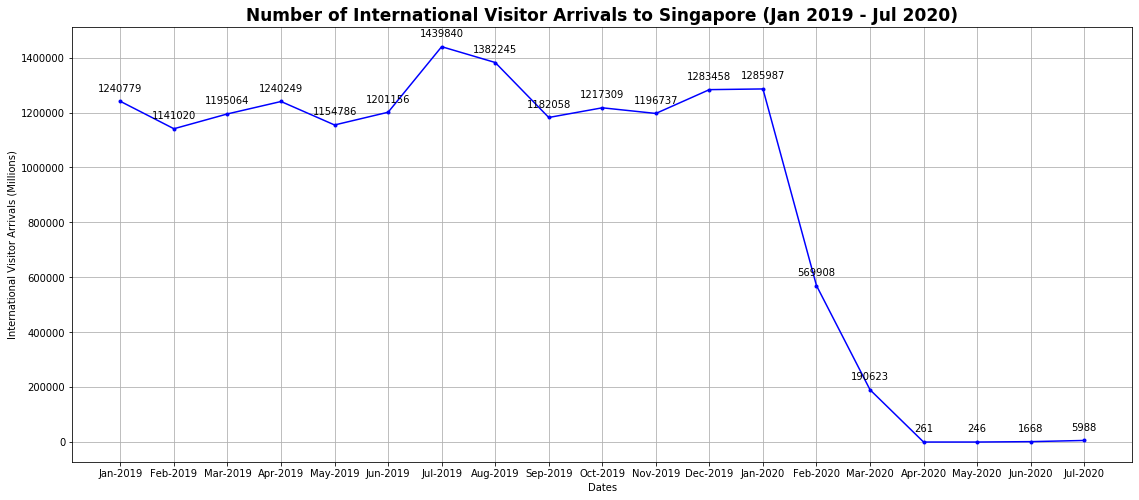

In [9]:
#Customizing the size of graph and input title of graph
#Bolding title of the graph and changing the fontsize to 17
plt.figure(figsize=(19,8))
plt.title('Number of International Visitor Arrivals to Singapore (Jan 2019 - Jul 2020)', fontdict = {'fontweight':'bold', 'fontsize':17})

#Plotting of line graph and formatting colour of the line graph to be blue
plt.plot(final_merged['Dates'], final_merged['International Visitor Arrivals By Inbound Tourism Markets, (Air)'], 'b.-')

#Labels for y and x axis
plt.ylabel('International Visitor Arrivals (Millions)')
plt.xlabel('Dates')

#Annotation of data labels on points in the graph as a whole number with no decimal places
for x,y in zip(final_merged['Dates'], final_merged['International Visitor Arrivals By Inbound Tourism Markets, (Air)']):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

#set the bins to display all the months and years 
plt.xticks(np.arange(len(int_visitors)), int_visitors['Dates'])

#Display gridlines in graph
plt.grid()

#Code below is to export the graph in .png format
#plt.savefig('Int_visitor_Graph.png', dpi=300) 

plt.show()

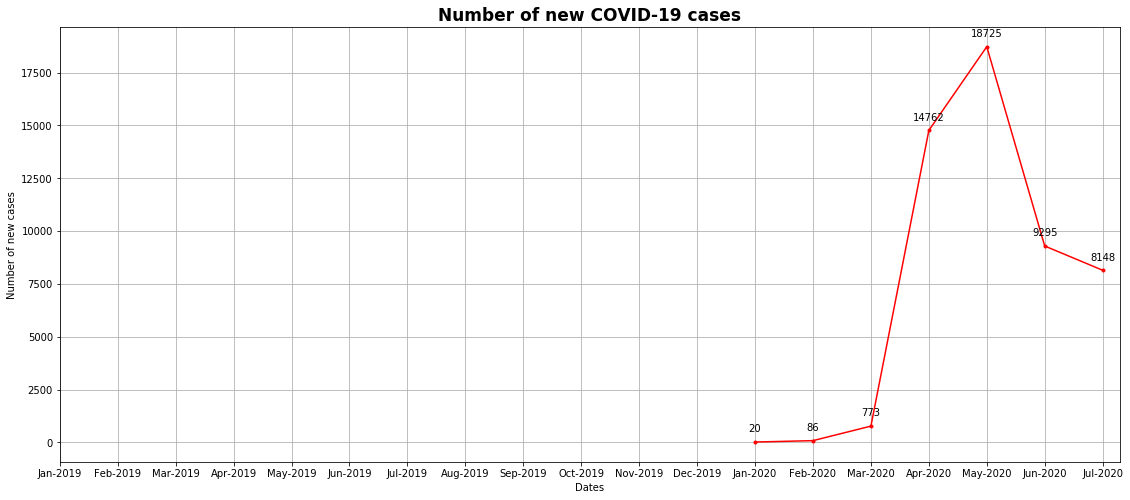

In [10]:
#Customizing the size of graph and input title of graph
#Bolding title of the graph and changing the fontsize to 17
plt.figure(figsize=(19,8))
plt.title('Number of new COVID-19 cases', fontdict = {'fontweight':'bold', 'fontsize':17})

#Plotting of line graph and formatting colour of the line graph to be red
plt.plot(final_merged['Dates'], final_merged['New_cases'], 'r.-')

#Labels for y and x axis
plt.ylabel('Number of new cases')
plt.xlabel('Dates')

#Annotation of data labels on points in the graph as a whole number with no decimal places
for x,y in zip(final_merged['Dates'], final_merged['New_cases']):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

#set the bins to display all the months and years 
plt.xticks(np.arange(len(final_merged)), final_merged['Dates'])

#Display gridlines in graph
plt.grid()

#Code below is to export the graph in .png format
#plt.savefig('Covid_Graph.png', dpi=300)

plt.show()

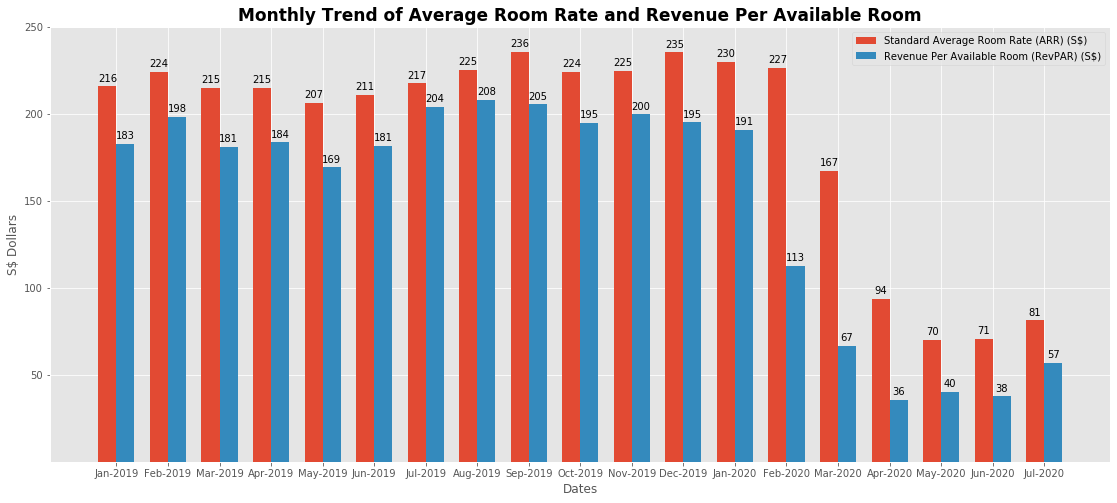

In [11]:
#Setting the width of the bar graph and bins for dates
width = 0.35
x = np.arange(len(final_merged['Dates']))

plt.style.use('ggplot')

#Plotting of side-by-side bar graph
fig, ax = plt.subplots(figsize=(19,8))
bar1 = ax.bar(x - width/2, final_merged['Standard Average Room Rate (S$)'], width, label='Men')
bar2 = ax.bar(x + width/2, final_merged['Revenue Per Available Room (S$)'], width, label='Women')

#Labels for y and x axis
plt.ylabel('S$ Dollars')
plt.xlabel('Dates')

#Labelling of legend
plt.legend(['Standard Average Room Rate (ARR) (S$)', 'Revenue Per Available Room (RevPAR) (S$)'])

#setting of bins for both y and x axis
plt.xticks(np.arange(len(final_merged)), final_merged['Dates'])
plt.yticks([50, 100, 150, 200, 250])

#Labelling graph title
plt.title('Monthly Trend of Average Room Rate and Revenue Per Available Room', 
          fontdict = {'fontweight':'bold', 'fontsize':17})

#Function to annotate data labels on points in bar graph as a whole number with no decimal places
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

#Code below is to export the graph in .png format
#plt.savefig('Monthlytrend_Graph.png', dpi=300)

plt.show()

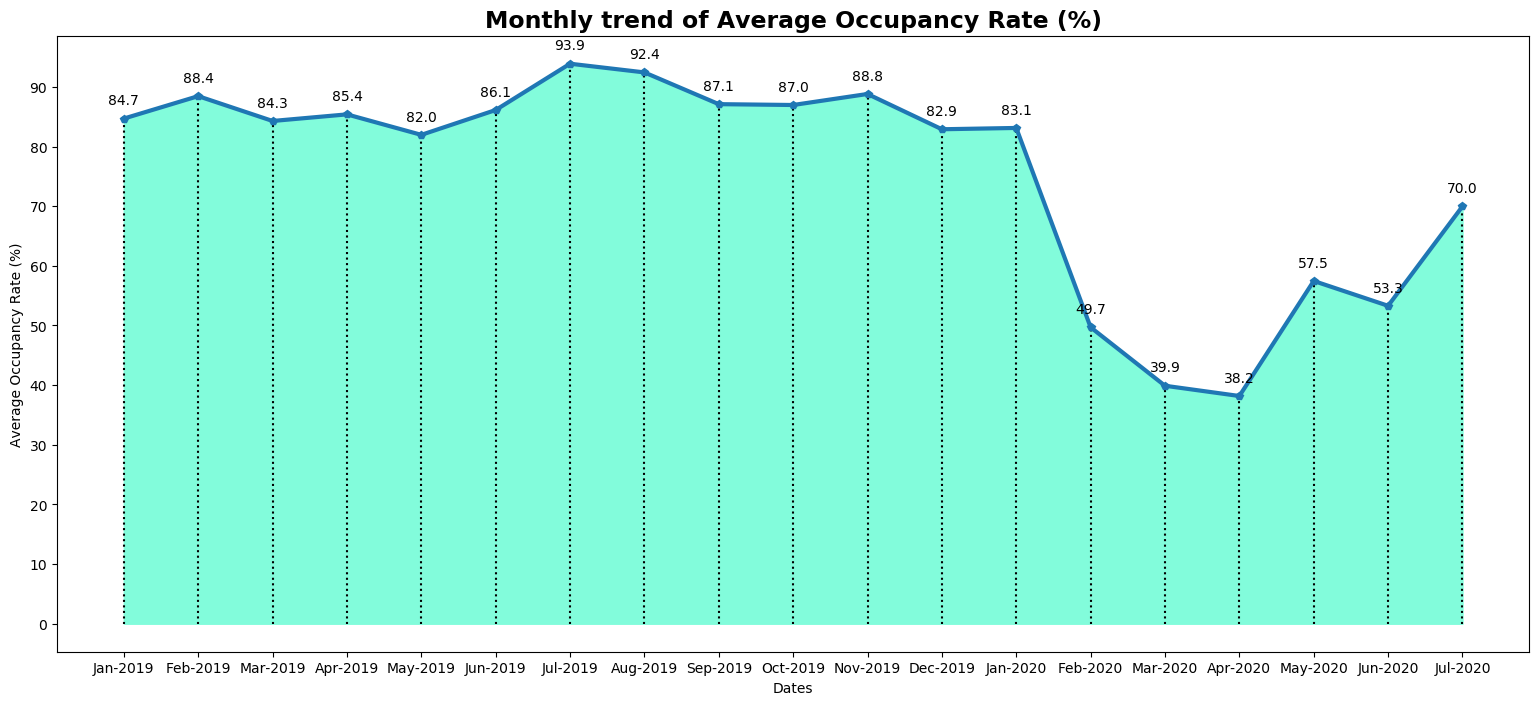

In [12]:
plt.style.use('default')

#Customizing the size of graph and input title of graph
#Labelling graph title and plotting of line graph
plt.figure(figsize=(19,8))
plt.title('Monthly trend of Average Occupancy Rate (%)', fontdict = {'fontweight':'bold', 'fontsize':17})
plt.plot(final_merged['Dates'], final_merged['Standard Average Occupancy Rate (%)'], 'p-', linewidth = 3)
plt.fill_between(final_merged['Dates'], final_merged['Standard Average Occupancy Rate (%)'], color = '#82FCDB')

#Labels for y and x axis
plt.ylabel('Average Occupancy Rate (%)')
plt.xlabel('Dates')

#Annotation of data labels on points in the graph in one decimal place
for x,y in zip(final_merged['Dates'], final_merged['Standard Average Occupancy Rate (%)']):
    label = "{:.1f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

#setting of bins for both y and x axis
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.xticks(np.arange(len(int_visitors)), int_visitors['Dates'])

#Show vertical dotted lines to easily see % for respective months
plt.vlines(final_merged['Dates'], 0, final_merged['Standard Average Occupancy Rate (%)'], linestyle="dotted")

#Code below is to export the graph in .png format
#plt.savefig('AOR_Graph.png', dpi=300)

plt.show()

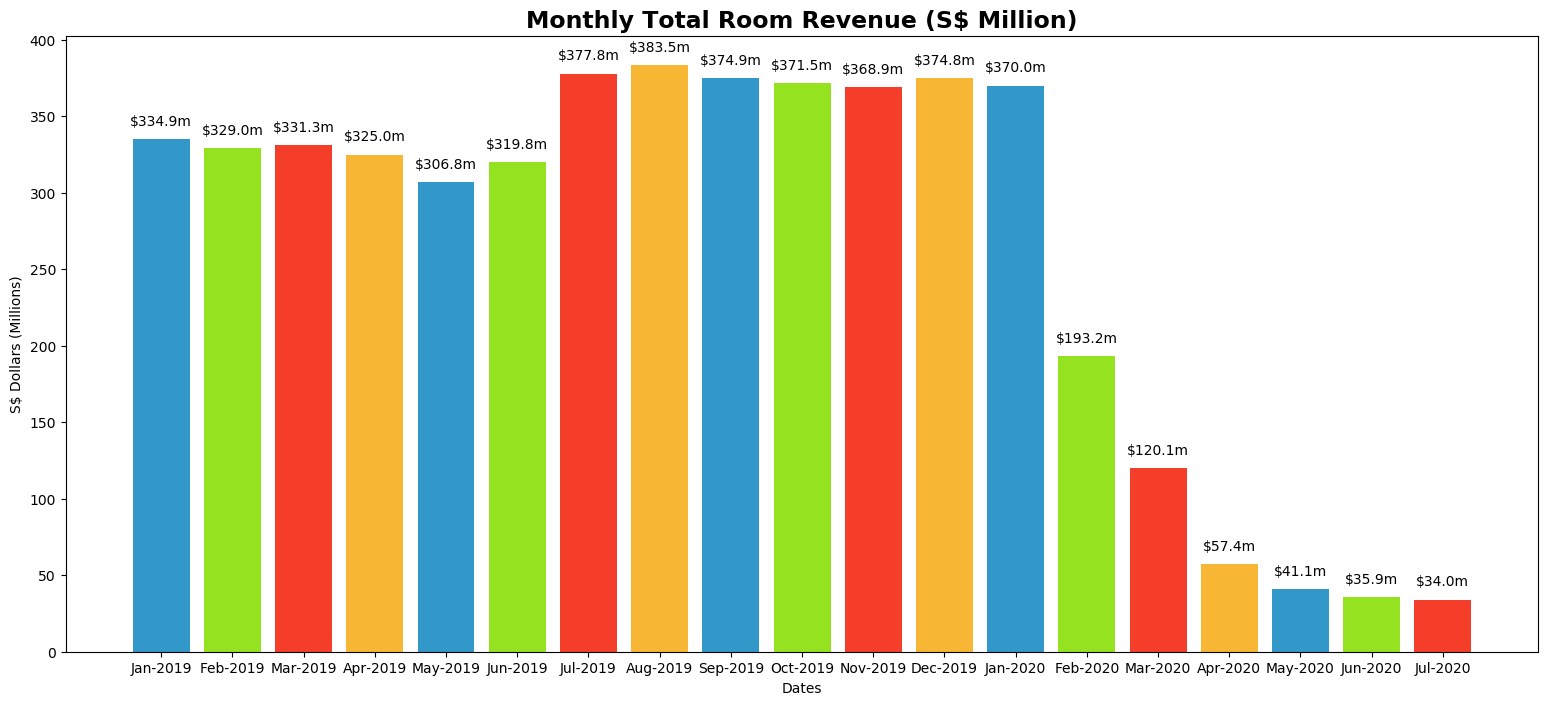

In [13]:
plt.style.use('default')

#Customizing the size of graph and input title of graph
#Labelling graph title and plotting of line graph
#Plotting of bar graph and customizing each bar's colour in hex code
plt.figure(figsize=(19,8))
plt.title('Monthly Total Room Revenue (S$ Million)', fontdict = {'fontweight':'bold', 'fontsize':17})
plt.bar(final_merged['Dates'], final_merged['Room Revenue (S$ Million)'], color=['#3297c9', '#95e320', 
                                                                                 '#f53e2a', '#f7b634', ])
#Labels for y and x axis
plt.ylabel('S$ Dollars (Millions)')
plt.xlabel('Dates')

#Annotation of data labels on points in the graph in one decimal place
for x,y in zip(final_merged['Dates'], final_merged['Room Revenue (S$ Million)']):
    label = "${:.1f}m".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

#Code below is to export the graph in .png format
#plt.savefig('Roomrev_Graph.png', dpi=300)    

plt.show()

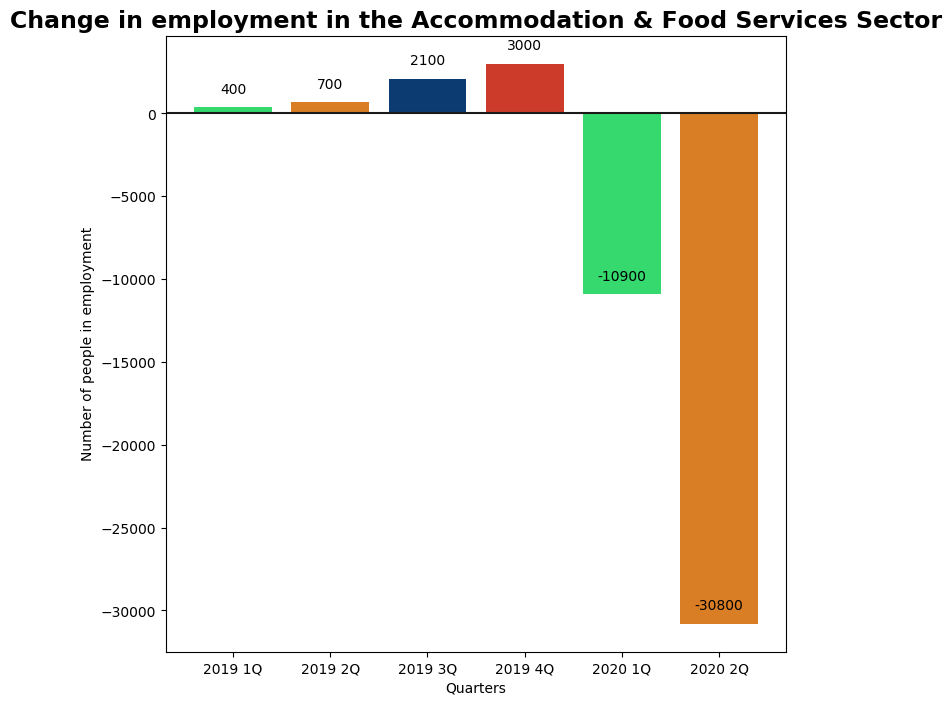

In [14]:
#Customizing the size of graph and input title of graph
#Labelling graph title and plotting of line graph
#Plotting of bar graph and customizing each bar's colour in hex code
plt.figure(figsize=(8,8))
plt.title('Change in employment in the Accommodation & Food Services Sector', fontdict = {'fontweight':'bold', 'fontsize':17})
plt.bar(employment_changes['Dates'], employment_changes['Accommodation & Food Services'], color = ['#35d96e', '#d97e25',
                                                                                                   '#0b3b71', '#cc3b2a'])
#Labels for y and x axis
plt.ylabel('Number of people in employment')
plt.xlabel('Quarters')

#Annotation of data labels on points in the graph as a whole number with no decimal places
for x,y in zip(employment_changes['Dates'], employment_changes['Accommodation & Food Services']):
    label = "{:.0f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')

#Draw horizontal black line across the 0 point
plt.axhline(y=0, color = '#1a1918', linestyle='-')

#Code below is to export the graph in .png format
#plt.savefig('Employment_Graph.png', dpi=300)

plt.show()